### Installs & Imports

In [18]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# 1. Named Entity Recognition

#### Distribution Analysis

In [ ]:
def visualize_ner_distribution(file_path):
    '''
        TBA
    '''
    tags_list = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            tags_list.extend(data['tags'])
    tag_counts = Counter(tags_list)

    # Use percentages
    total_tags = sum(tag_counts.values())
    tag_percentages = {tag: (count / total_tags) * 100 for tag, count in tag_counts.items()}

    sorted_tags = sorted(tag_percentages.items(), key=lambda x: x[1], reverse=True)
    labels, percentages = zip(*sorted_tags)

    # Visualize with the actual labels
    label_mapping = {
        0: 'O', 1: 'B-CARDINAL', 2: 'B-DATE', 3: 'I-DATE', 4: 'B-PERSON', 5: 'I-PERSON',
        6: 'B-NORP', 7: 'B-GPE', 8: 'I-GPE', 9: 'B-LAW', 10: 'I-LAW', 11: 'B-ORG',
        12: 'I-ORG', 13: 'B-PERCENT', 14: 'I-PERCENT', 15: 'B-ORDINAL', 16: 'B-MONEY',
        17: 'I-MONEY', 18: 'B-WORK_OF_ART', 19: 'I-WORK_OF_ART', 20: 'B-FAC',
        21: 'B-TIME', 22: 'I-CARDINAL', 23: 'B-LOC', 24: 'B-QUANTITY', 25: 'I-QUANTITY',
        26: 'I-NORP', 27: 'I-LOC', 28: 'B-PRODUCT', 29: 'I-TIME', 30: 'B-EVENT',
        31: 'I-EVENT', 32: 'I-FAC', 33: 'B-LANGUAGE', 34: 'I-PRODUCT', 35: 'I-ORDINAL',
        36: 'I-LANGUAGE'
    }
    labels = [label_mapping[label] for label in labels]

    # Create the bar chart (horizontal)
    plt.figure(figsize=(12, 8))
    sns.barplot(y=labels, x=percentages, hue=labels, palette='viridis', legend=False) # Make the plot horizontal for better readability
    for index, value in enumerate(percentages):
        plt.text(value + 0.1, index, f'{value:.2f}%', va='center', fontsize=9)
    plt.xlabel('Percentage (%)')
    plt.ylabel('Label')
    filename = os.path.basename(file_path) 
    plt.title(f'Distribution of NER Labels in {filename}')
    # plt.xscale('log') # Since the bars are really small, we could use log-sclaed x-axis so the bars appear bigger, again with the % at the end of the bar.
    plt.show()

In [14]:
# Training data (merge 4 files together to visualize; a new file is created as a result of the merging called 'merged_train' and is saved in the folder)
train_files = ['Training Data/NERC Data/train00.json', 'Training Data/NERC Data/train01.json', 'Training Data/NERC Data/train02.json', 'Training Data/NERC Data/train03.json']

output_file = 'Training Data/NERC Data/merged_train.json'
with open(output_file, 'w', encoding='utf-8') as out_file:
    for file in train_files:
        with open(file, 'r', encoding='utf-8') as in_file:
            for line in in_file:
                out_file.write(line) 

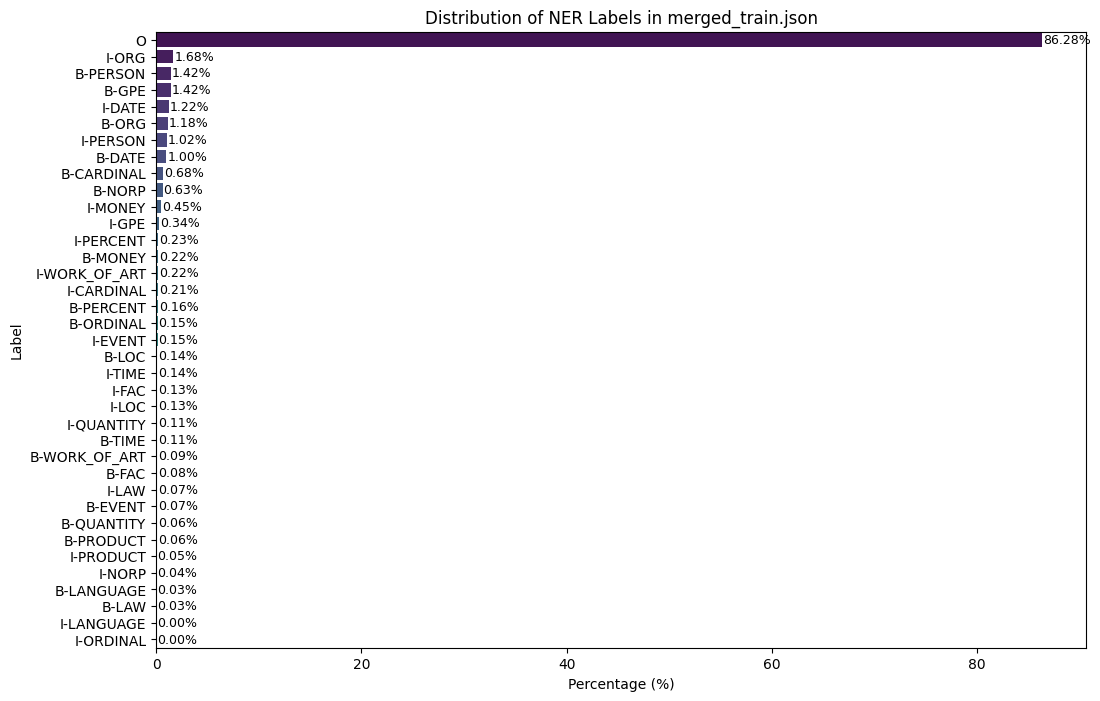

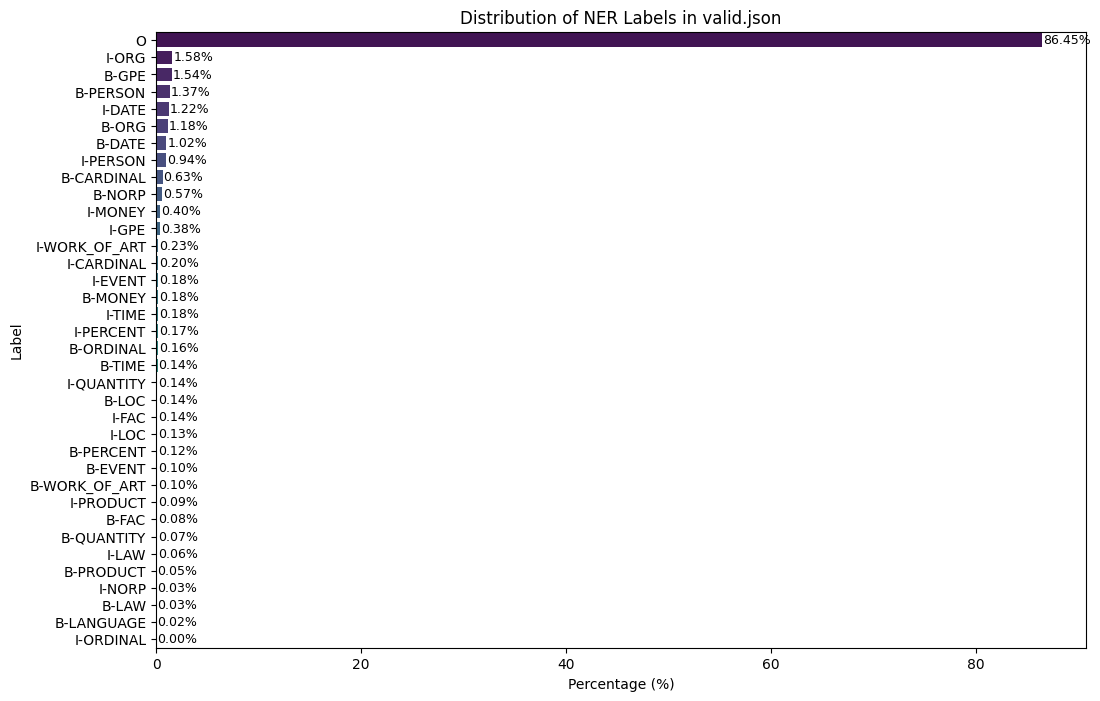

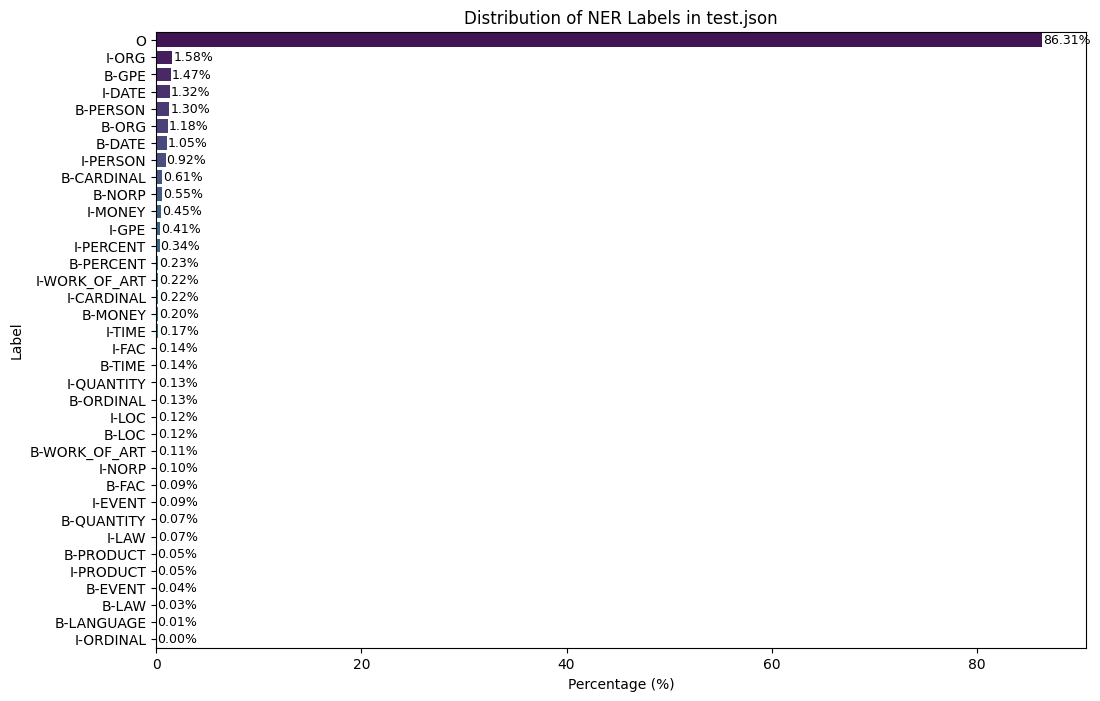

In [20]:
files = ['Training Data/NERC Data/merged_train.json', 'Training Data/NERC Data/valid.json', 'Training Data/NERC Data/test.json']

for file in files:
    visualize_ner_distribution(file)

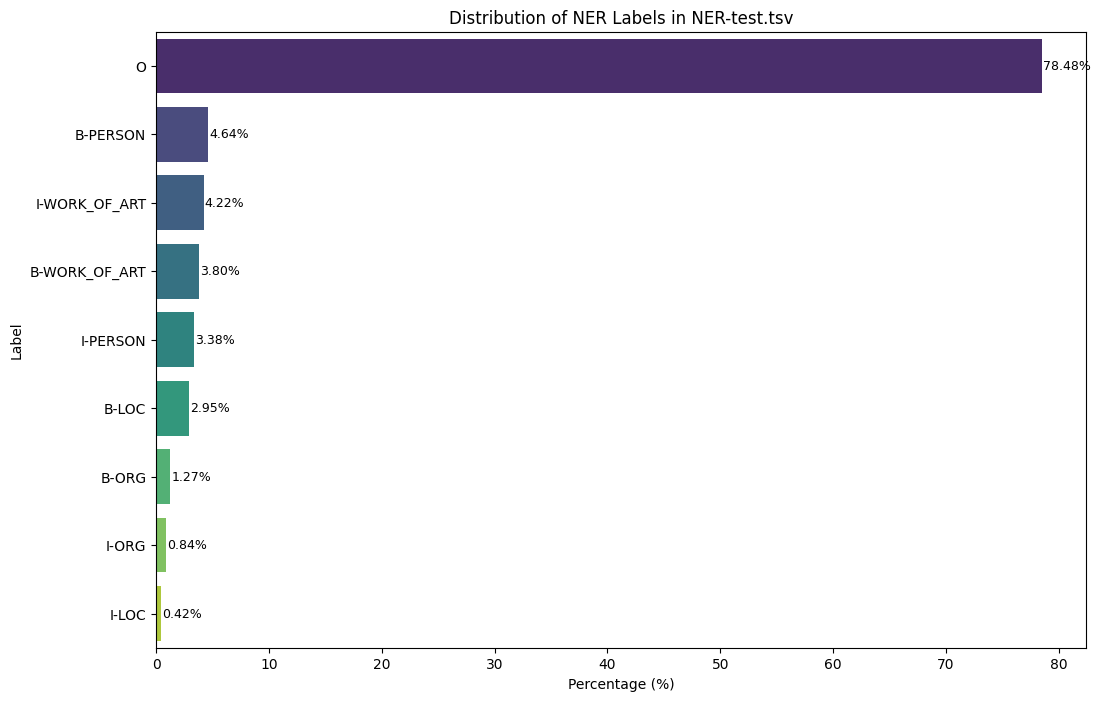

In [ ]:
# Distribution of provided Test set (from .tsv file)
file_path = 'Test Data/NER-test.tsv'
df = pd.read_csv(file_path, delimiter='\t')
tag_counts = Counter(df['BIO_NER_tag'])

total_tags = sum(tag_counts.values())
tag_percentages = {tag: (count / total_tags) * 100 for tag, count in tag_counts.items()}

sorted_tags = sorted(tag_percentages.items(), key=lambda x: x[1], reverse=True)
labels, percentages = zip(*sorted_tags)

# Create the bar chart (horizontal)
plt.figure(figsize=(12, 8))
sns.barplot(y=labels, x=percentages, hue=labels, palette='viridis', legend=False)
for index, value in enumerate(percentages):
    plt.text(value + 0.1, index, f'{value:.2f}%', va='center', fontsize=9)
plt.xlabel('Percentage (%)')
plt.ylabel('Label')
# plt.xlim(0,100) # x-axis is from 0 to 100; idk which looks better
filename = os.path.basename(file_path) 
plt.title(f'Distribution of NER Labels in {filename}')
plt.show()

#### Training & Validation Sets

In [6]:
# currently the instances are sentences, we need them to be transformed so that the instances are words
# also when transforming add sentence_id and token_id to the words within the same sentence 
# need to merge the training files into one dataframe, we can also include the test or the validation in the training data 
# and keep only either test and validation seperately for checking 

#### Test Set

#### Feature Engineering

#### Model Training

# 2. Sentiment Analysis

#### Distribution Analysis

In [ ]:
def visualize_sentiment_distribution(file_path):
    '''
        TBA
    '''
    df = pd.read_csv(file_path)
    sentiment_counts = Counter(df['sentiment'])
    
    total_labels = sum(sentiment_counts.values())
    sentiment_percentages = {label: (count / total_labels) * 100 for label, count in sentiment_counts.items()}

    sorted_labels = sorted(sentiment_percentages.items(), key=lambda x: x[1], reverse=True)
    labels, percentages = zip(*sorted_labels)

    # Create the bar chart (horizontal)
    plt.figure(figsize=(8, 5))
    sns.barplot(y=labels, x=percentages, hue=labels, palette='viridis', legend=False)
    for index, value in enumerate(percentages):
        plt.text(value + 0.2, index, f'{value:.2f}%', va='center', fontsize=9)
    plt.xlabel('Percentage (%)')
    plt.ylabel('Label')
    # plt.xlim(0,100) # x-axis is from 0 to 100; idk which looks better
    filename = os.path.basename(file_path) 
    plt.title(f'Distribution of Sentiment Labels in {filename}')
    plt.show()

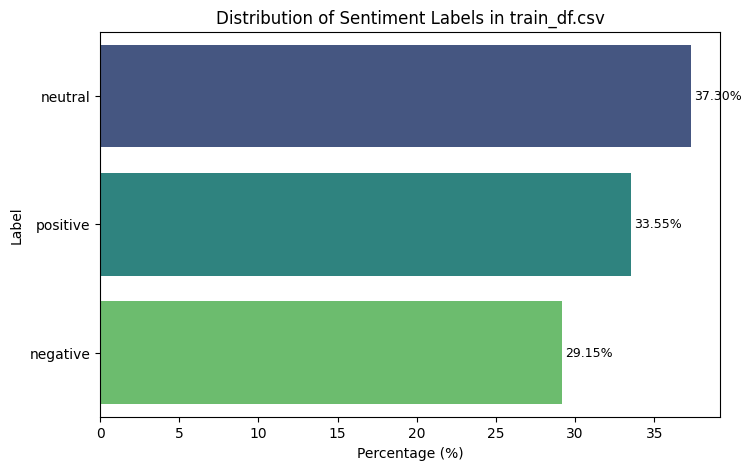

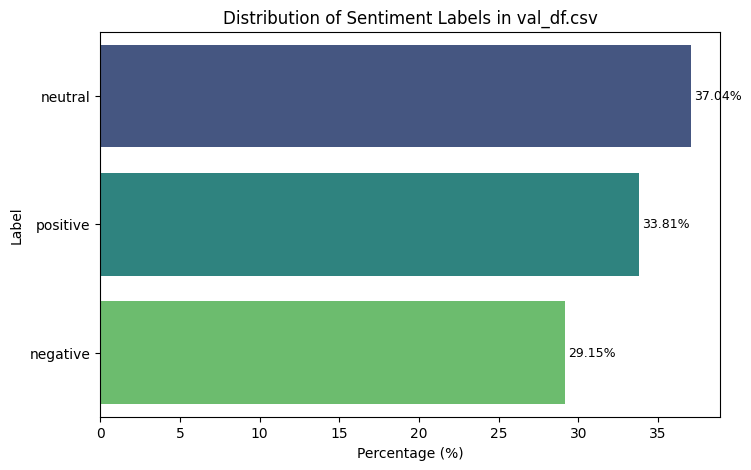

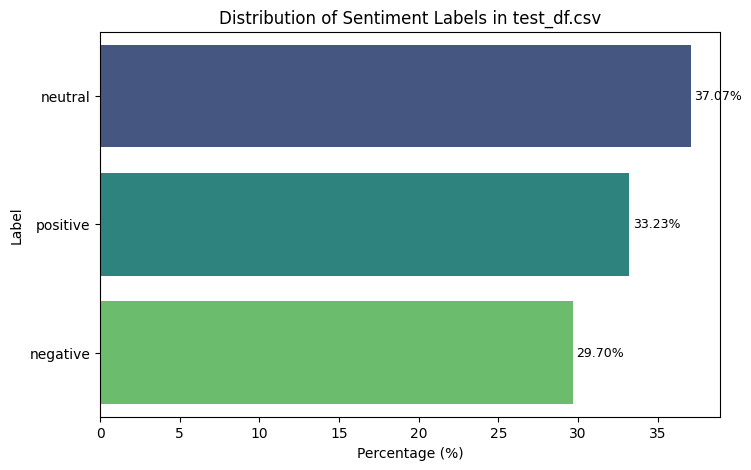

In [30]:
files = ['Training Data/Sentiment Analysis Data/train_df.csv', 'Training Data/Sentiment Analysis Data/val_df.csv', 'Training Data/Sentiment Analysis Data/test_df.csv']

for file in files:
    visualize_sentiment_distribution(file)

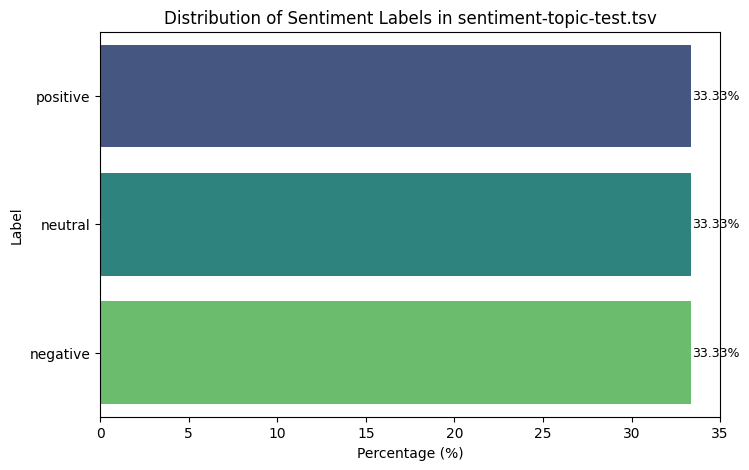

In [ ]:
# Distribution of provided Test set (from .tsv file)
file_path = 'Test Data/sentiment-topic-test.tsv'
df = pd.read_csv(file_path, delimiter='\t')

sentiment_counts = Counter(df['sentiment'])

total_labels = sum(sentiment_counts.values())
sentiment_percentages = {label: (count / total_labels) * 100 for label, count in sentiment_counts.items()}

sorted_labels = sorted(sentiment_percentages.items(), key=lambda x: x[1], reverse=True)
labels, percentages = zip(*sorted_labels)

# Create the bar chart (horizontal)
plt.figure(figsize=(8,5))
sns.barplot(y=labels, x=percentages, hue=labels, palette='viridis', legend=False)
for index, value in enumerate(percentages):
    plt.text(value + 0.1, index, f'{value:.2f}%', va='center', fontsize=9)
plt.xlabel('Percentage (%)')
plt.ylabel('Label')
# plt.xlim(0,100) # x-axis is from 0 to 100; idk which looks better
filename = os.path.basename(file_path) 
plt.title(f'Distribution of Sentiment Labels in {filename}')
plt.show()

#### Training & Validation Sets

#### Test Set (the same test set is used for both sentiment analysis and topic modeling)

#### Feature Engineering

#### Model Training

# 3. Topic Classification

#### Distribution Analysis

In [33]:
def visualize_topic_distribution(file_path):
    '''
        TBA
    '''
    df = pd.read_csv(file_path)

    topic_counts = Counter(df['label'])

    total_labels = sum(topic_counts.values())
    topic_percentages = {label: (count / total_labels) * 100 for label, count in topic_counts.items()}

    sorted_labels = sorted(topic_percentages.items(), key=lambda x: x[1], reverse=True)
    labels, percentages = zip(*sorted_labels)

    # Create the bar chart (horizontal)
    plt.figure(figsize=(8, 5))
    sns.barplot(y=labels, x=percentages, hue=labels, palette='viridis', legend=False)
    for index, value in enumerate(percentages):
        plt.text(value + 0.2, index, f'{value:.2f}%', va='center', fontsize=9)
    plt.xlabel('Percentage (%)')
    plt.ylabel('Label')
    # plt.xlim(0,100) # x-axis is from 0 to 100; idk which looks better
    filename = os.path.basename(file_path) 
    plt.title(f'Distribution of Topic Labels in {filename}')
    plt.show()

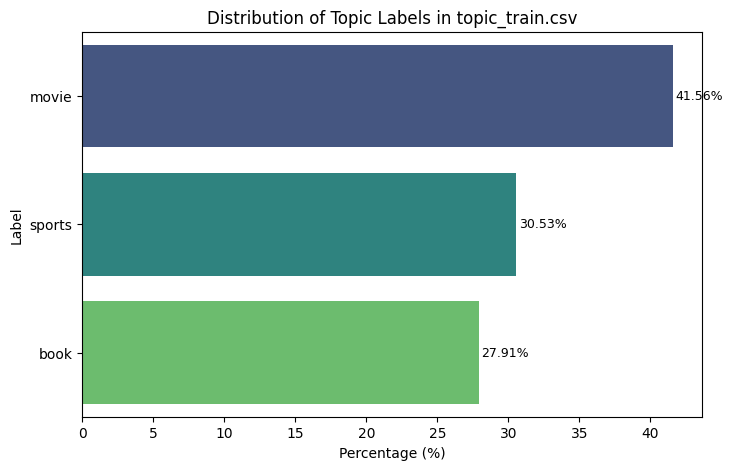

In [34]:
# This dataset did not come split; therefore, plot the whole thing here, and we can call the vis function for each split after, if we want to plot each part
files = ['Training Data/Topic Classification Data/topic_train.csv']

for file in files:
    visualize_topic_distribution(file)

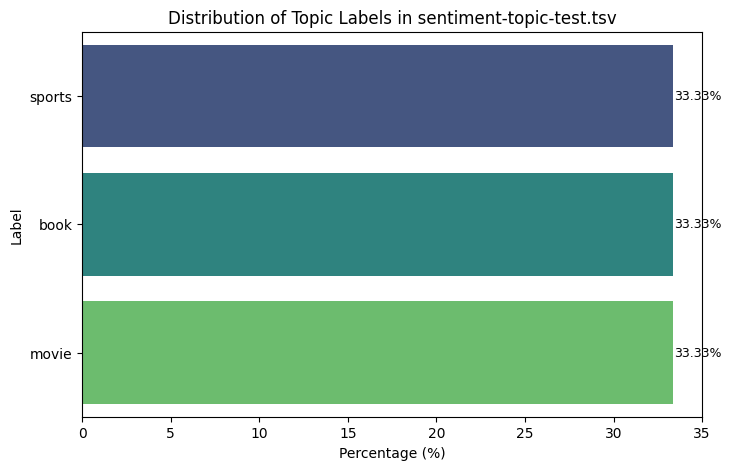

In [ ]:
# Distribution of provided Test set (from .tsv file)
file_path = 'Test Data/sentiment-topic-test.tsv'
df = pd.read_csv(file_path, delimiter='\t')

sentiment_counts = Counter(df['topic'])

total_labels = sum(sentiment_counts.values())
sentiment_percentages = {label: (count / total_labels) * 100 for label, count in sentiment_counts.items()}

sorted_labels = sorted(sentiment_percentages.items(), key=lambda x: x[1], reverse=True)
labels, percentages = zip(*sorted_labels)

# Create the bar chart (horizontal)
plt.figure(figsize=(8, 5))
sns.barplot(y=labels, x=percentages, hue=labels, palette='viridis', legend=False)
for index, value in enumerate(percentages):
    plt.text(value + 0.1, index, f'{value:.2f}%', va='center', fontsize=9)
plt.xlabel('Percentage (%)')
plt.ylabel('Label')
# plt.xlim(0,100) # x-axis is from 0 to 100; idk which looks better
filename = os.path.basename(file_path) 
plt.title(f'Distribution of Topic Labels in {filename}')
plt.show()

#### Training & Validation Sets

In [13]:
# perhaps filter reviews that are one-word like 'good', 'great' 
# format the reviews text the same way, some of them are within '', others are not, make all without ''
# make graphs of data distribution

#### Test Set (the same test set is used for both sentiment analysis and topic modeling)

#### Feature Engineering

#### Model Training